### 1. Data science Workflows/ML project Walkthrough

In [1]:
import pandas as pd


In [10]:
house_data = pd.read_csv("datasets/kigali houses data.csv")
house_data.head()

,Number,Location,Area,Price,Bedrooms,Bathrooms,Wardrobes,Cabinets,Balcony,Parking,Quarters
0,1,Kinyinya,25/35 m,55 000 000 Rwf,4.0,1.0,NaN,NaN,NaN,Yes,Yes
1,2,Gacuriro,sqm,180 000 000 Rwf,4.0,4.0,NaN,NaN,Yes,NaN,NaN
2,3,Kabeza,25/30 m,45 000 000 Rwf,4.0,3.0,NaN,NaN,NaN,NaN,NaN
3,4,NaN,sqm,8 500 000 Rwf,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Kimironko,sqm,28 000 000 Rwf,4.0,3.0,Yes,Yes,Yes,Yes,Yes


In [11]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4799 entries, 0 to 4798
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Number      4799 non-null   int64  
 1     Location  4241 non-null   object 
 2     Area      4799 non-null   object 
 3     Price     4799 non-null   object 
 4   Bedrooms    4270 non-null   float64
 5   Bathrooms   4510 non-null   float64
 6   Wardrobes   1021 non-null   object 
 7   Cabinets    1466 non-null   object 
 8   Balcony     1074 non-null   object 
 9   Parking     3220 non-null   object 
 10  Quarters    2820 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 412.5+ KB


In [12]:
house_data.nunique(dropna=False)

Number        4799
  Location     119
  Area         146
  Price        165
Bedrooms        15
Bathrooms       11
Wardrobes        2
Cabinets         2
Balcony          2
Parking          2
Quarters         2
dtype: int64

In [13]:
house_data.drop(columns='Number', inplace=True)
house_data

,Location,Area,Price,Bedrooms,Bathrooms,Wardrobes,Cabinets,Balcony,Parking,Quarters
0,Kinyinya,25/35 m,55 000 000 Rwf,4.0,1.0,NaN,NaN,NaN,Yes,Yes
1,Gacuriro,sqm,180 000 000 Rwf,4.0,4.0,NaN,NaN,Yes,NaN,NaN
2,Kabeza,25/30 m,45 000 000 Rwf,4.0,3.0,NaN,NaN,NaN,NaN,NaN
3,NaN,sqm,8 500 000 Rwf,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Kimironko,sqm,28 000 000 Rwf,4.0,3.0,Yes,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
4794,Kanombe,sqm,52 000 000 Rwf,4.0,3.0,NaN,Yes,NaN,NaN,NaN
4795,NaN,500 sqm,14 000 000 Rwf,5.0,2.0,NaN,NaN,Yes,NaN,Yes
4796,Rugende,945 sqm,28 500 000 Rwf,5.0,3.0,NaN,NaN,NaN,NaN,NaN
4797,Kabuga,30/20 m,15 000 000 Rwf,4.0,1.0,Yes,Yes,Yes,Yes,NaN


In [17]:
nu = house_data.isnull().sum()

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_missing_values(df):
    """
    Shows the distribution of the non-missing vs mising values.
    """
    plt.figure(figsize=(10, 5))
    plt.title('Distribution of Missing Values')
    sns.heatmap(df.isnull(), cbar=False)


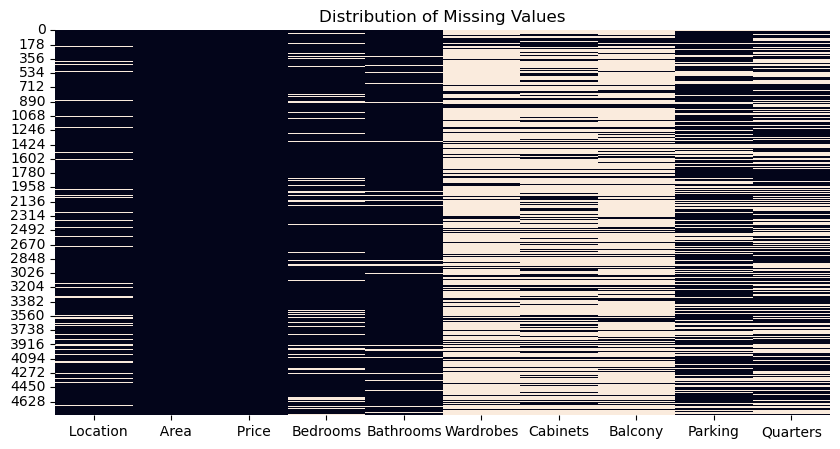

In [21]:
plot_missing_values(house_data)

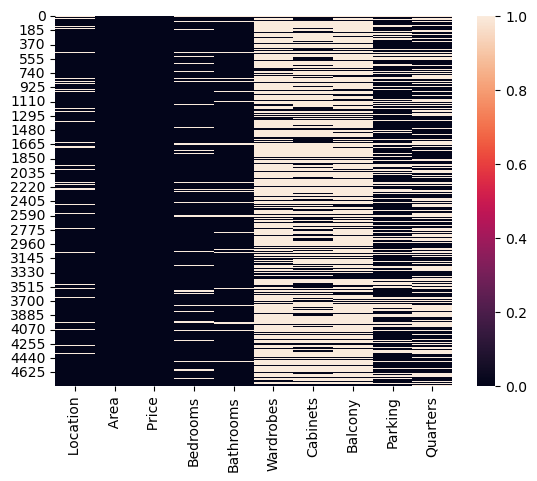

In [24]:
sns.heatmap(house_data.isnull());

In [32]:
### 2. 
house_data.columns = house_data.columns.str.strip().str.lower()
house_data.columns

Index(['location', 'area', 'price', 'bedrooms', 'bathrooms', 'wardrobes',
       'cabinets', 'balcony', 'parking', 'quarters'],
      dtype='object')

In [38]:
house_data['area'].value_counts()

 sqm        1809
25/30 m      730
20/30 m      494
25/20 m      232
30/20 m      158
            ... 
1/238 m        1
320 sqm        1
2383 sqm       1
18/25 m        1
1399 sqm       1
Name: area, Length: 146, dtype: int64

In [45]:
def clean_area(area):
    # Split the string by space
    parts = area.split()
    for part in parts:
       
        if '/' in part:
            # Split the part by '/'
            nums = part.split('/')
            # Convert the numbers to integers and multiply them
            return int(nums[0]) * int(nums[1])
        # Check if the part contains 'sqm'
        elif 'sqm' in part:
            # Return None if 'sqm' is found
            return None
        # Check if the part contains only digits
        elif part.isdigit():
            # Return the number if it contains only digits
            return int(part)
    # Return None if no valid number is found
    return None




150


In [52]:
print(clean_area('20/70 m'))

1400


In [54]:
house_data['clean_area'] = house_data['area'].apply(clean_area)
house_data['price'].value_counts()

55 000 000  Rwf     321
65 000 000  Rwf     271
60 000 000  Rwf     262
50 000 000  Rwf     256
35 000 000  Rwf     200
                   ... 
13 500  Rwf           1
500 000  Rwf          1
211 000 000  Rwf      1
 75 000 $             1
7 500 000  Rwf        1
Name: price, Length: 165, dtype: int64

In [77]:
def clean_price(price):
    
    price = price.lower()
    if 'rwf' in price:
        cln_price = price.replace('rwf', '').replace(' rwf', '').replace('rwf ', '').replace(' ','')
        return int(cln_price)
    elif '$' in price:
        cln_price = price.replace('$', '').replace(' $', '').replace('$ ', '').replace(' ','').replace('  ','')
        return int(cln_price) * 1300
    else:
        return None

In [78]:
house_data['clean_price'] = house_data['price'].apply(clean_price)
house_data

,location,area,price,bedrooms,bathrooms,wardrobes,cabinets,balcony,parking,quarters,clean_area,clean_price
0,Kinyinya,25/35 m,55 000 000 Rwf,4.0,1.0,NaN,NaN,NaN,Yes,Yes,875.0,55000000.0
1,Gacuriro,sqm,180 000 000 Rwf,4.0,4.0,NaN,NaN,Yes,NaN,NaN,NaN,180000000.0
2,Kabeza,25/30 m,45 000 000 Rwf,4.0,3.0,NaN,NaN,NaN,NaN,NaN,750.0,45000000.0
3,NaN,sqm,8 500 000 Rwf,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8500000.0
4,Kimironko,sqm,28 000 000 Rwf,4.0,3.0,Yes,Yes,Yes,Yes,Yes,NaN,28000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4794,Kanombe,sqm,52 000 000 Rwf,4.0,3.0,NaN,Yes,NaN,NaN,NaN,NaN,52000000.0
4795,NaN,500 sqm,14 000 000 Rwf,5.0,2.0,NaN,NaN,Yes,NaN,Yes,500.0,14000000.0
4796,Rugende,945 sqm,28 500 000 Rwf,5.0,3.0,NaN,NaN,NaN,NaN,NaN,945.0,28500000.0
4797,Kabuga,30/20 m,15 000 000 Rwf,4.0,1.0,Yes,Yes,Yes,Yes,NaN,600.0,15000000.0
